In [7]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [31]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [15]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [14]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [16]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)


In [17]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [18]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [28]:
# Find the most recent date in the data set.
max_date = session.query(func.max(measurement.date)).first()
max_date

('2017-08-23',)

<Axes: xlabel='date'>

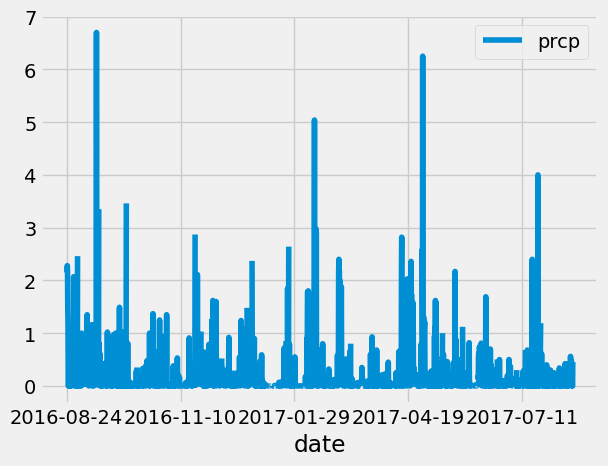

In [78]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
max_date_obj = datetime.strptime(max_date[0], '%Y-%m-%d')
one_year_before = max_date_obj - timedelta(days=365)
one_year_before

# Perform a query to retrieve the data and precipitation scores
new_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= one_year_before).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
dp_data = pd.DataFrame(data = new_data, columns = ['date', 'prcp'])

# Sort the dataframe by date
dpdp_data = dp_data.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
dpdp_data.plot(x = 'date', y = 'prcp')

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_sumstat = dpdp_data['prcp'].describe()
prcp_sumstat

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [48]:
# Design a query to calculate the total number of stations in the dataset
num_stations = session.query(func.count(station.station)).all()
num_stations

[(9,)]

In [67]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_name = session.query(measurement.station, func.count(measurement.prcp)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.prcp).desc()).all()
    
station_name

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
max_temp = session.query(func.max(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
min_temp = session.query(func.min(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()
avg_temp = session.query(func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').all()

min_temp, max_temp, avg_temp

[(54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

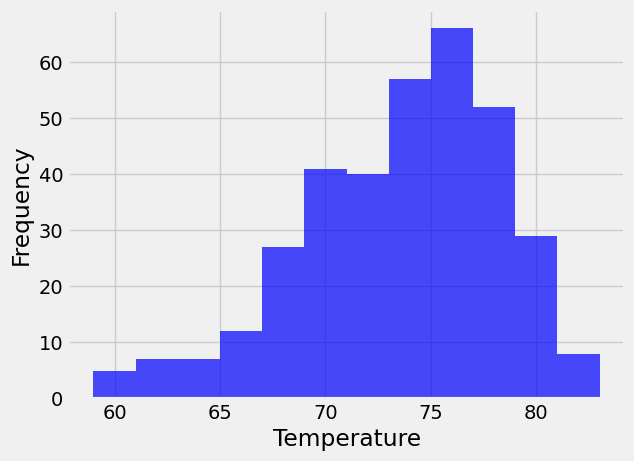

In [98]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
new_data2 = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').\
    filter(measurement.date >= one_year_before).all()

dp_data2 = pd.DataFrame(data = new_data2, columns = ['tobs'])
dpdp_data2 = dp_data2.sort_values('tobs')
plt.hist(dpdp_data2, bins = 12, color = 'blue', alpha = 0.7)
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close Session

In [16]:
# Close Session
session.close()